# 1. IMPORT

In [615]:
import numpy as np
import pandas as pd

In [616]:
# Text Preprocessing
import string #
import re # Regular Expression
import pprint # Pretty Print for long texts
from random import randint
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [617]:
# Feature Engineering
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [737]:
# Text Classification
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import tree # Decision Tree
from sklearn import ensemble # Random Forest
from sklearn import linear_model, preprocessing # Linear Regression
from sklearn.metrics import r2_score

from xgboost import XGBRegressor

In [619]:
# Visual
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [620]:
# File system
import os
from os import listdir
from os.path import isfile, join
# Warning
import warnings
warnings.filterwarnings('ignore')

# 2. READ DATA

In [621]:
df = pd.read_csv('train-chennai-sale.csv')
pd.set_option('display.max_columns', None)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [622]:
df.shape

(7109, 22)

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [624]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [625]:
df.describe() # Checking the data distribution

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [626]:
# Checking correlation between columns
df.corr() 

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.786348,0.515390,0.951279,0.019850,-0.008337,0.008865,0.014025,0.657544,0.571076,0.612125
DIST_MAINROAD,0.002022,1.000000,-0.002566,0.001970,0.002301,0.002237,-0.029468,0.001554,-0.017313,0.011600,0.010994,0.018783
N_BEDROOM,0.786348,-0.002566,1.000000,0.755214,0.840286,0.015112,-0.007635,0.015569,0.014209,0.455357,0.430424,0.330999
N_BATHROOM,0.515390,0.001970,0.755214,1.000000,0.568688,0.013112,-0.012057,0.013196,0.007907,0.260324,0.256533,0.108884
N_ROOM,0.951279,0.002301,0.840286,0.568688,1.000000,0.016524,-0.007545,0.015072,0.015459,0.630932,0.533343,0.602760
QS_ROOMS,0.019850,0.002237,0.015112,0.013112,0.016524,1.000000,0.008828,0.007789,0.517741,0.019739,0.009377,0.021967
QS_BATHROOM,-0.008337,-0.029468,-0.007635,-0.012057,-0.007545,0.008828,1.000000,-0.011745,0.551125,-0.006719,-0.000471,-0.011377
QS_BEDROOM,0.008865,0.001554,0.015569,0.013196,0.015072,0.007789,-0.011745,1.000000,0.630447,0.021526,0.020118,0.018804
QS_OVERALL,0.014025,-0.017313,0.014209,0.007907,0.015459,0.517741,0.551125,0.630447,1.000000,0.022482,0.017004,0.020556
REG_FEE,0.657544,0.011600,0.455357,0.260324,0.630932,0.019739,-0.006719,0.021526,0.022482,1.000000,0.659903,0.878148


## Observation
---------------
1. Rows: 7109 and Columns: 22
2. N_BEDROOM, N_BATHROOM, QS_OVERALL have Null values
3. N_BEDROOM and N_BATHROOM have data type float, need to be changed to int type
4. DATE_SALE and DATE_BUILD should be converted to AGE of building
5. PRT_ID column are not necessary for analysis & prediction as their is no correlation with SALES_PRICE.

# 3. TEXT PRE-PROCESSING

## 3.1 General Data Cleaning

In [627]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [628]:
# Use fillna() to add value for Null columns like N_BEDROOM, N_BATHROOM & QS_OVERALL
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0], inplace=True)
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0], inplace=True)

In [629]:
# N_BEDROOM and N_BATHROOM change datatype to int
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)

In [630]:
# Drop unnecessary column PRT_ID
df.drop(columns=['PRT_ID'], inplace=True)

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   int32  
 5   N_BATHROOM     7109 non-null   int32  
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  REG_FEE 

In [632]:
df.shape # one column dropped

(7109, 21)

In [633]:
df.isnull().sum() # No null values in any column

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [634]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


##### Observation
-------------
1. Removed all unncessary columns due to very low correlation with Sales Price
2. Filled all null datas
3. Changed the data types of two columns

## 3.2 Column by Column Cleaning

### 3.2.1 AREA

In [635]:
# Check for unique areas
print(df['AREA'].unique(), '\n Total unique areas: ', len(df['AREA'].unique()))
# Many duplicate area names are present e.g., Chrompet, Karapakkam, T Nagar, Anna Nagar, Velchery

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar'] 
 Total unique areas:  17


In [636]:
# Replacing duplicate area names with single name
df['AREA'].replace({
                    'Karapakam' : 'Karapakkam',
                    'Ana Nagar' : 'Anna Nagar',
                    'Ann Nagar' : 'Anna Nagar',
                    'Chrompt' : 'Chrompet',
                    'Chrmpet' : 'Chrompet',
                    'Chormpet' : 'Chrompet',
                    'TNagar' : 'T Nagar',
                    'Velchery' : 'Velachery',
                    'Adyr' : 'Adyar',
                    'KKNagar' : 'KK Nagar'
}, inplace=True)

In [637]:
print(df['AREA'].unique(), '\n Total unique areas: ', len(df['AREA'].unique()))
# Unique area names reduced from 17 to 7

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar'] 
 Total unique areas:  7


In [638]:
# print('Area data type before: ', df.AREA.dtype)
# df.AREA = df.AREA.astype('string')
# print('Area data type now: ', df.AREA.dtype) 

##### Observation
-----------------
1. Duplicate area names are corrected, now we have only 7 unique areas.
2. Data type of Area column is changed to String

### 3.2.2 N_BEDROOM, N_BATHROOM & N_ROOM

In [639]:
df.N_BEDROOM.value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

In [640]:
df.N_BATHROOM.value_counts()

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

In [641]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

##### Observation
-----------------
1. Mostly single & double bedroom houses were sold mostly.
2. Single bathroom houses sold most.
3. Total 4 or 5 rooms house were sold most.
4. These numbers show average expectation of buyers in house.

### 3.2.3 SALE_COND

In [642]:
# Check unique keywords
print(df.SALE_COND.unique(), '\n Total unique keywords: ', len(df.SALE_COND.unique()))
# Contains duplicate keywords

['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl'] 
 Total unique keywords:  9


In [643]:
# Replacing duplicate keywords with single keyword
df.SALE_COND.replace({
                        'Ab Normal' : 'AbNormal',
                        'Partiall' : 'Partial',
                        'PartiaLl' : 'Partial',
                        'AdjLand' : 'Adj Land'
}, inplace=True)

In [644]:
# After cleaning
print(df.SALE_COND.unique(), '\n Total unique keywords: ', len(df.SALE_COND.unique()))

['AbNormal' 'Family' 'Partial' 'Adj Land' 'Normal Sale'] 
 Total unique keywords:  5


In [645]:
df.SALE_COND.value_counts()
# Normal Sale 
# Abnorml: Abnormal Sale - trade, foreclosure, short sale 
# AdjLand: Adjoining Land Purchase 
# Family: Sale between family members 
# Partial: Home was not completed when last assessed

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

##### Observation
-----------------
1. Duplicate Sale condition keywords are replaced. Now only 5 sales condition remain.

### 3.2.4 PARK_FACIL

In [646]:
# Check for unique keywords
print(df.PARK_FACIL.unique(), '\n Total unique keywords: ', len(df.PARK_FACIL.unique() ))
# Duplicates exists

['Yes' 'No' 'Noo'] 
 Total unique keywords:  3


In [647]:
# Replace duplicate keywords
df.PARK_FACIL.replace({
                        'Noo' : 'No'
}, inplace=True)

In [648]:
# After Cleaning
print(df.PARK_FACIL.unique(), '\n Total unique keywords: ', len(df.PARK_FACIL.unique() ))

['Yes' 'No'] 
 Total unique keywords:  2


In [649]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

##### Observation
-----------------
1. Duplicate keywords 'Noo' was chanted to 'No'
2. Houses with and without Parking facilities were sold almost equally.

### 3.2.5 BUILDTYPE

In [650]:
# Check for unique keywords
print(df.BUILDTYPE.unique(), '\n Total unique keywords: ', len(df.BUILDTYPE.unique() ))
# Duplicates exists

['Commercial' 'Others' 'Other' 'House' 'Comercial'] 
 Total unique keywords:  5


In [651]:
# Replacing duplicate keywords
df.BUILDTYPE.replace({
                        'Comercial' : 'Commercial',
                        'Other' : 'Others'
}, inplace=True)

In [652]:
# After Cleaning
print(df.BUILDTYPE.unique(), '\n Total unique keywords: ', len(df.BUILDTYPE.unique() ))

['Commercial' 'Others' 'House'] 
 Total unique keywords:  3


In [653]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

##### Observation
-----------------
1. Duplicate keywords Commerical & Others were cleaned
2. Mostly build type of house were sold

### 3.2.6 UTILITY_AVAIL

In [654]:
# Check for unique keywords
print(df.UTILITY_AVAIL.unique(), '\n Total unique keywords: ', len(df.UTILITY_AVAIL.unique() ))
# Duplicates exists

['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub'] 
 Total unique keywords:  5


In [655]:
# Replacing duplicate keywords
df.UTILITY_AVAIL.replace({
                        'All Pub' : 'AllPub',
                        'NoSewr ' : 'NoSewr'
}, inplace=True)

In [656]:
# After Cleaning
print(df.UTILITY_AVAIL.unique(), '\n Total unique keywords: ', len(df.UTILITY_AVAIL.unique() ))

['AllPub' 'ELO' 'NoSewr' 'NoSeWa'] 
 Total unique keywords:  4


In [657]:
df.UTILITY_AVAIL.value_counts()
# AllPub: All public Utilities (E,G,W,& S)
# NoSewr: Electricity, Gas, and Water (Septic Tank)
# NoSeWa: Electricity and Gas Only
# ELO: Electricity only STREET

AllPub    1887
NoSeWa    1871
NoSewr    1829
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

##### Observation
-----------------
1. Duplicate keyword AllPub was cleaned
2. Mostly AllPub utility type of house were sold

### 3.2.7 STREET

In [658]:
# Check for unique keywords
print(df.STREET.unique(), '\n Total unique keywords: ', len(df.STREET.unique() ))
# Duplicates exists

['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess'] 
 Total unique keywords:  5


In [659]:
# Replacing duplicate keywords
df.STREET.replace({
                        'Pavd' : 'Paved',
                        'NoAccess' : 'No Access'
}, inplace=True)

In [660]:
# After Cleaning
print(df.STREET.unique(), '\n Total unique keywords: ', len(df.STREET.unique() ))

['Paved' 'Gravel' 'No Access'] 
 Total unique keywords:  3


In [661]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

##### Observation
-----------------
1. Duplicate keyword Pavd, NoAccess were cleaned
2. Mostly Paved & Gravel street house were sold

### 3.2.8 MZZONE

In [662]:
# Check for unique keywords
print(df.MZZONE.unique(), '\n Total unique keywords: ', len(df.MZZONE.unique() ))
# NO Duplicates exists

['A' 'RH' 'RL' 'I' 'C' 'RM'] 
 Total unique keywords:  6


In [663]:
df.MZZONE.value_counts()
# A: Agriculture
# C: Commercial
# I: Industrial
# RH: Residential High Density
# RL: Residential Low Density
# RM: Residential Medium Density

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

##### Observation
-----------------
1. Mostly houses in residential low and medium density were sold

### 3.2.9 REG_FEE & COMMIS

In [664]:
# Correlation value for PRT_ID, QS_OVERALL, QS_ROOMS, QS_BATHROOM, QS_BEDROOM w.r.t. SALES_PRICE
# print(df.PRT_ID.corr(df.SALES_PRICE)) ----> No correlation as data types are different
print(df.REG_FEE.corr(df.SALES_PRICE))
print(df.COMMIS.corr(df.SALES_PRICE))

0.8781483918228501
0.6262754127126994


##### Observation
-----------------
1. Registration fee and commisions are totally dependent on sales price, therefore the correlation is high.
2. These does affect the buyers decision, as higher the sales price higher are REG_FEE & COMMIS.

### 3.2.10 DATE_SALE & DATE_BUILD

In [665]:
# Data type of Date Build and Date Sale
print(df.DATE_BUILD.dtype)
print(df.DATE_SALE.dtype)

object
object


In [666]:
# Changing data type to Date/Time format
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
df.DATE_SALE = pd.to_datetime(df.DATE_SALE)

In [667]:
# Data type of Date Build and Date Sale
print(df.DATE_BUILD.dtype)
print(df.DATE_SALE.dtype)

datetime64[ns]
datetime64[ns]


In [668]:
df[['DATE_BUILD', 'DATE_SALE']].head()

,DATE_BUILD,DATE_SALE
0,1967-05-15,2011-04-05
1,1995-12-22,2006-12-19
2,1992-09-02,2012-04-02
3,1988-03-18,2010-03-13
4,1979-10-13,2009-05-10


##### Observation
-----------------
1. Changed the data type to datetime format
2. Age of each house can be calculated

# 4. FEATURE ENGINEERING

## 4.1 HOUSE_AGE

In [669]:
# Create Age of the Building coloumn HOUSE_AGE
df['HOUSE_AGE'] = ((df.DATE_SALE - df.DATE_BUILD)/np.timedelta64(1, 'Y')).astype('int')
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,43
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,19
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,21
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,29


## 4.2 Dimensionality Reduction

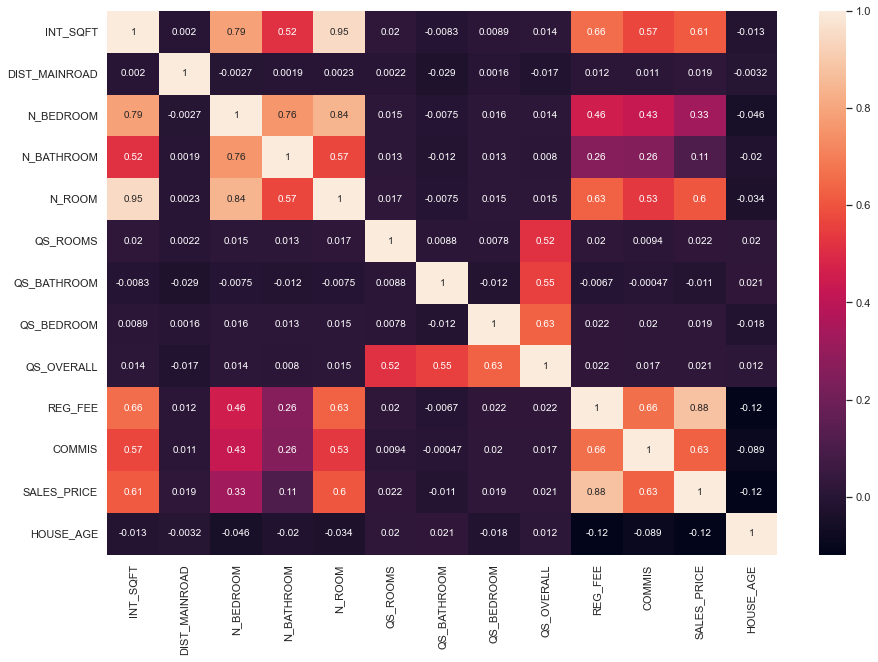

In [670]:
# Correlation value for QS_OVERALL, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, DIST_MAINROAD w.r.t. SALES_PRICE
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()
# Columns which have less than 5% correlation with SALES_PRICE is not necessary for predicting HOUSE PRICE

In [671]:
# Correlation value for PRT_ID, QS_OVERALL, QS_ROOMS, QS_BATHROOM, QS_BEDROOM w.r.t. SALES_PRICE
print('Correlation with SALES_PRICE in (%): ')
print('QS_OVERALL: ', df.QS_OVERALL.corr(df.SALES_PRICE)*100)
print('QS_ROOMS: ', df.QS_ROOMS.corr(df.SALES_PRICE)*100)
print('QS_BATHROOM: ', df.QS_BATHROOM.corr(df.SALES_PRICE)*100)
print('QS_BEDROOM: ', df.QS_BEDROOM.corr(df.SALES_PRICE)*100)
print('DIST_MAINROAD: ', df.DIST_MAINROAD.corr(df.SALES_PRICE)*100)

# Columns which have less than 5% correlation with SALES_PRICE is not necessary for predicting SALES_PRICE

Correlation with SALES_PRICE in (%): 
QS_OVERALL:  2.0556111968052
QS_ROOMS:  2.196740547164276
QS_BATHROOM:  -1.1377384945967053
QS_BEDROOM:  1.8803963059181317
DIST_MAINROAD:  1.8783412253401597


In [672]:
# Drop unnecessary columns PRT_ID, QS_OVERALL, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, 'DATE_SALE', 'DATE_BUILD', 'DIST_MAINROAD'
df.drop(columns=[ 'QS_OVERALL', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'DATE_SALE', 'DATE_BUILD', 'DIST_MAINROAD'], inplace=True)
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,380000,144400,7600000,43
1,Anna Nagar,1986,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,760122,304049,21717770,10
2,Adyar,909,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,421094,92114,13159200,19
3,Velachery,1855,3,2,5,Family,No,Others,NoSewr,Paved,I,356321,77042,9630290,21
4,Karapakkam,1226,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,237000,74063,7406250,29


In [673]:
df.shape
# Columns reduced

(7109, 15)

## 4.3 Outliers

In [674]:
df.describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,1.636939,1.213110,3.688704,376938.330708,141005.726544,1.089491e+07,23.550710
std,457.410902,0.802881,0.409534,1.019099,143070.662010,78768.093718,3.768603e+06,12.435546
min,500.000000,1.000000,1.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.000000
25%,993.000000,1.000000,1.000000,3.000000,272406.000000,84219.000000,8.272100e+06,13.000000
50%,1373.000000,1.000000,1.000000,4.000000,349486.000000,127628.000000,1.033505e+07,23.000000
75%,1744.000000,2.000000,1.000000,4.000000,451562.000000,184506.000000,1.299390e+07,33.000000
max,2500.000000,4.000000,2.000000,6.000000,983922.000000,495405.000000,2.366734e+07,55.000000


Text(0.5, 1.0, 'HOUSE_AGE')

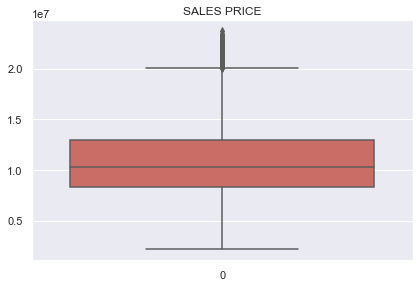

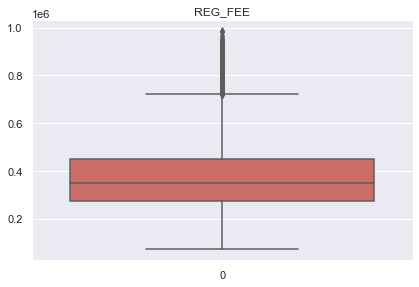

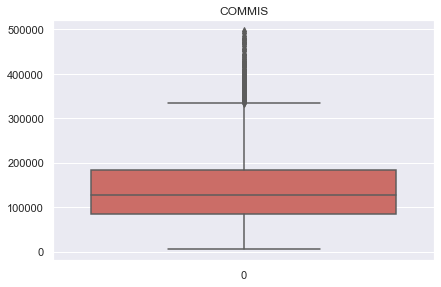

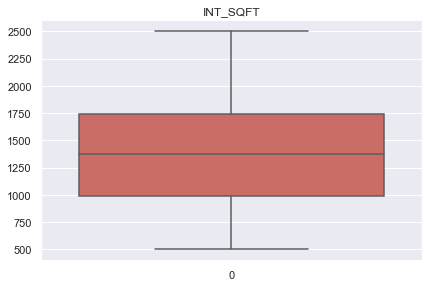

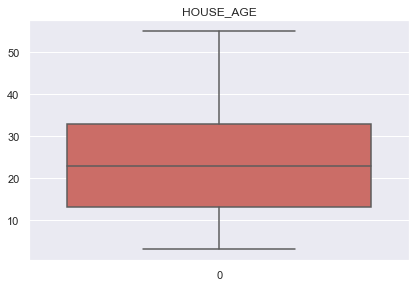

In [675]:
plt.figure(figsize=(15, 15))
plt.subplot(321)
sns.boxplot(data=df.loc[:, 'SALES_PRICE'])
plt.title('SALES PRICE')

plt.figure(figsize=(15, 15))
plt.subplot(322)
sns.boxplot(data=df.loc[:, 'REG_FEE'])
plt.title('REG_FEE')

plt.figure(figsize=(15, 15))
plt.subplot(323)
sns.boxplot(data=df.loc[:, 'COMMIS'])
plt.title('COMMIS')

plt.figure(figsize=(15, 15))
plt.subplot(324)
sns.boxplot(data=df.loc[:, 'INT_SQFT'])
plt.title('INT_SQFT')

plt.figure(figsize=(15, 15))
plt.subplot(323)
sns.boxplot(data=df.loc[:, 'HOUSE_AGE'])
plt.title('HOUSE_AGE')

# plt.figure(figsize=(15, 15))
# plt.subplot(324)
# sns.boxplot(data=df.loc[:, 'DIST_MAINROAD'])
# plt.title('DIST_MAINROAD')

## Observation
---------------
1. Created new column HOUSE_AGE to know how age of building affect the price.
2. No outliers in HOUSE_AGE, INT_SQFT columns
3. SALES_PRICE, REG_FEE & COMMIS have outliers, its valid because some houses can be costly due to various reasons, which also affects REG_FEE & COMMIS.

# 5. EXPLORATORY DATA ANALYSIS

## 5.1 Categorical Feature Analysis

In [676]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,380000,144400,7600000,43
1,Anna Nagar,1986,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,760122,304049,21717770,10
2,Adyar,909,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,421094,92114,13159200,19
3,Velachery,1855,3,2,5,Family,No,Others,NoSewr,Paved,I,356321,77042,9630290,21
4,Karapakkam,1226,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,237000,74063,7406250,29


### 5.1.1 AREA

Text(0.5, 0, 'Areas')

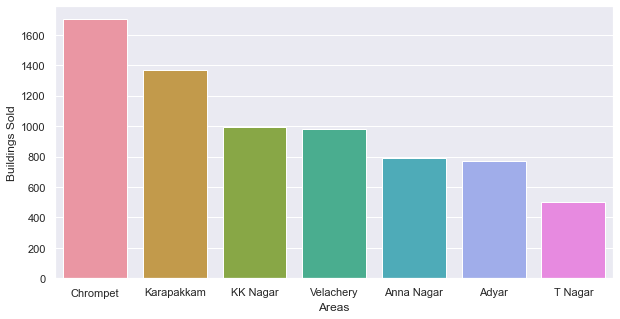

In [677]:
# Plot the popular area in Chennai (descending order) sales wise
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
plt.figure(figsize=(10, 5))
sns.barplot(y = df.AREA.value_counts(), x = df.AREA.value_counts().index)
plt.ylabel('Buildings Sold')
plt.xlabel('Areas')

Text(0.5, 0, 'Areas')

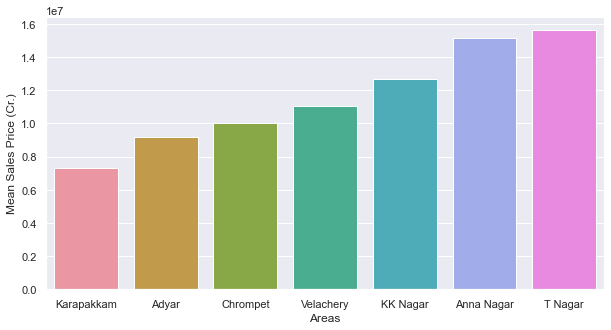

In [678]:
# Plot areas w.r.t Sales price (ascending order)
plt.figure(figsize=(10, 5))
Area_SaleP = df.groupby('AREA')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = Area_SaleP['SALES_PRICE'], x = Area_SaleP['AREA'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('Areas')

##### Observation
-------------------
1. House Sales in T-Nagar & Anna Nagar are less, reason is mostly due to very high selling price, which is due to T Nagar being main area in Chennai, and may be the no. of houses sold are very less than the average.
2. Karapakkam and Chrompet houses are sold more due to less price.
3. Adyar, Velachery and KK Nagar houses are average performing assests.
4. Ordinal encoding can be applied.

### 5.1.2  N_BEDROOM, N_BATHROOM & N_ROOM

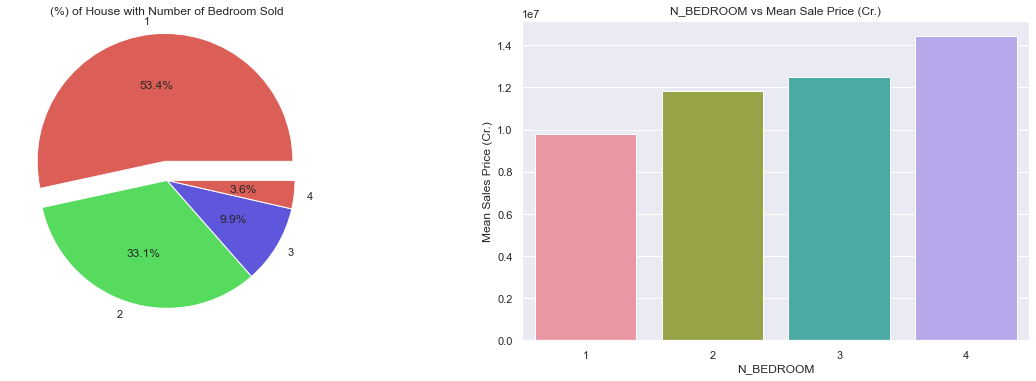

In [679]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.15, 0, 0, 0)
plt.pie(df.N_BEDROOM.value_counts(), labels=df.N_BEDROOM.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('(%) of House with Number of Bedroom Sold')

plt.subplot(322)
NBED_SaleP = df.groupby('N_BEDROOM')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = NBED_SaleP['SALES_PRICE'], x = NBED_SaleP['N_BEDROOM'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('N_BEDROOM')
plt.title('N_BEDROOM vs Mean Sale Price (Cr.)')

plt.show()

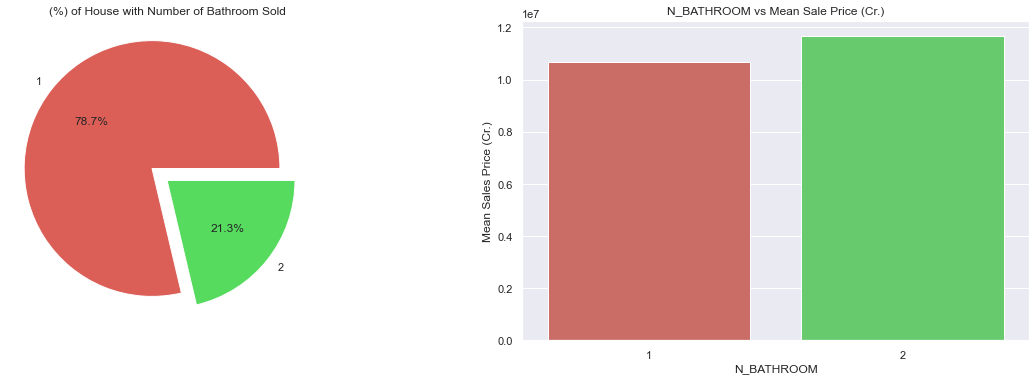

In [680]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.15, 0)
plt.pie(df.N_BATHROOM.value_counts(), labels=df.N_BATHROOM.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('(%) of House with Number of Bathroom Sold')

plt.subplot(322)
NBath_SaleP = df.groupby('N_BATHROOM')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = NBath_SaleP['SALES_PRICE'], x = NBath_SaleP['N_BATHROOM'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('N_BATHROOM')
plt.title('N_BATHROOM vs Mean Sale Price (Cr.)')

plt.show()

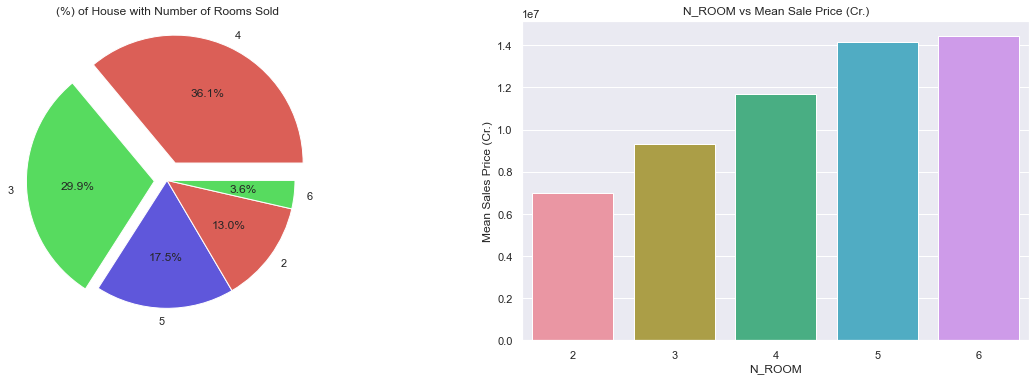

In [681]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.15, 0.1, 0, 0, 0)
plt.pie(df.N_ROOM.value_counts(), labels=df.N_ROOM.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('(%) of House with Number of Rooms Sold')

plt.subplot(322)
NRoom_SaleP = df.groupby('N_ROOM')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = NRoom_SaleP['SALES_PRICE'], x = NRoom_SaleP['N_ROOM'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('N_ROOM')
plt.title('N_ROOM vs Mean Sale Price (Cr.)')

plt.show()

##### Observation
----------------
1. 53.4% houses sold were with Single bedroom and 78.7% houses sold were with Single bathroom due to their least mean sales price.
2. Mostly 4 room house were sold and their sale price is average.

### 5.1.3 SALE_COND

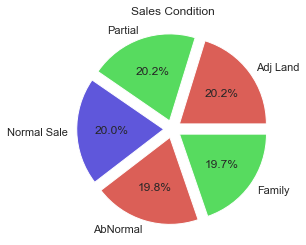

In [682]:
e = (0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(df.SALE_COND.value_counts(), labels=df.SALE_COND.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('Sales Condition')
plt.show()

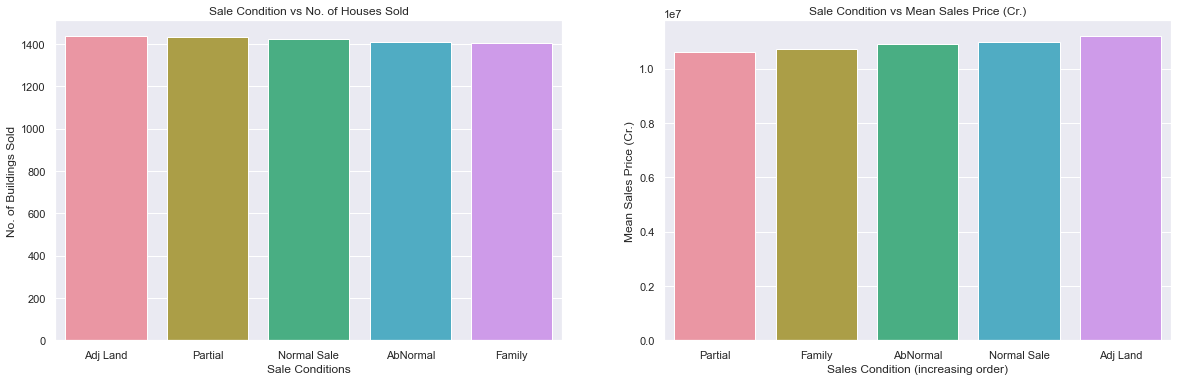

In [683]:
# Plot the popular area in Chennai (descending order) sales wise
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
plt.figure(figsize=(20, 20))
plt.subplot(321)
sns.barplot(y = df.SALE_COND.value_counts(), x = df.SALE_COND.value_counts().index)
plt.ylabel('No. of Buildings Sold')
plt.xlabel('Sale Conditions')
plt.title('Sale Condition vs No. of Houses Sold')

plt.subplot(322)
SaleC_SaleP = df.groupby('SALE_COND')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = SaleC_SaleP['SALES_PRICE'], x = SaleC_SaleP['SALE_COND'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('Sales Condition (increasing order)')
plt.title('Sale Condition vs Mean Sales Price (Cr.)')

plt.show()

##### Observation
-----------------
1. From pie & bar chart, adjoining land (Adj Land) & Partial conditions houses were sold most.
2. Adj Land houses were the costiest and Partial condition houses were cheapest comparitevely.
3. Ordinal encoding can be applied.

### 5.1.4 PARK_FACIL

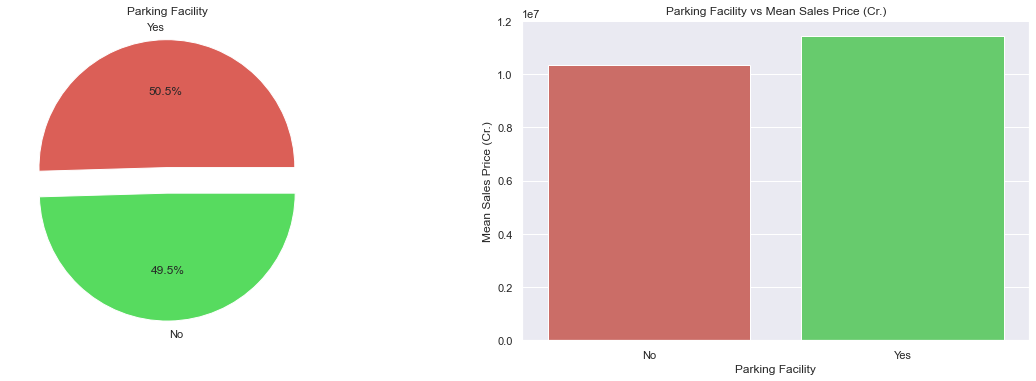

In [684]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.1, 0.1)
plt.pie(df.PARK_FACIL.value_counts(), labels=df.PARK_FACIL.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('Parking Facility')

plt.subplot(322)
Park_SaleP = df.groupby('PARK_FACIL')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = Park_SaleP['SALES_PRICE'], x = Park_SaleP['PARK_FACIL'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('Parking Facility')
plt.title('Parking Facility vs Mean Sales Price (Cr.)')

plt.show()

##### Observation
------------------
1. Houses with parking facilities were sold 50.5% which eventually had higher mean sales price.
2. Ordinal encoding can be applied.

### 5.1.5 BUILDTYPE

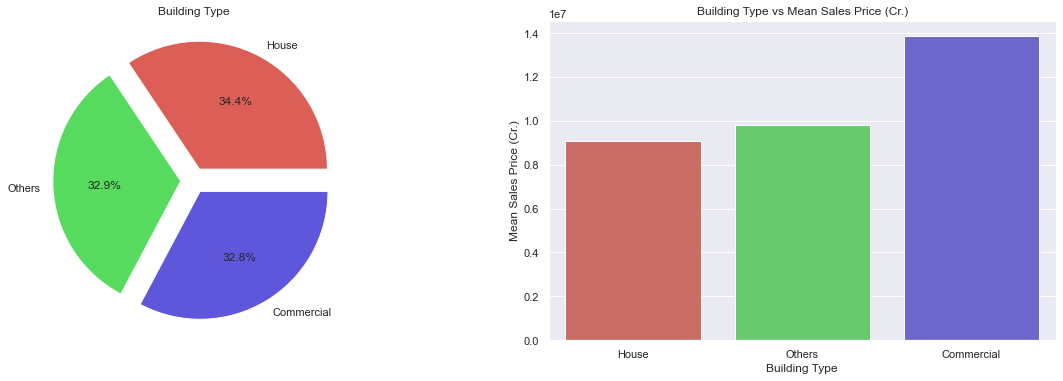

In [685]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.1, 0.1, 0.1)
plt.pie(df.BUILDTYPE.value_counts(), labels=df.BUILDTYPE.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('Building Type')

plt.subplot(322)
BuildT_SaleP = df.groupby('BUILDTYPE')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = BuildT_SaleP['SALES_PRICE'], x = BuildT_SaleP['BUILDTYPE'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('Building Type')
plt.title('Building Type vs Mean Sales Price (Cr.)')

plt.show()

##### Observation
---------------------
1. Most sold (34.4%) building type were Houses, reason being cheaper compared to other.
2. Commerical Building are the costliest.
3. Ordinal encoding can be applied.

### 5.1.6 UTILITY_AVAIL

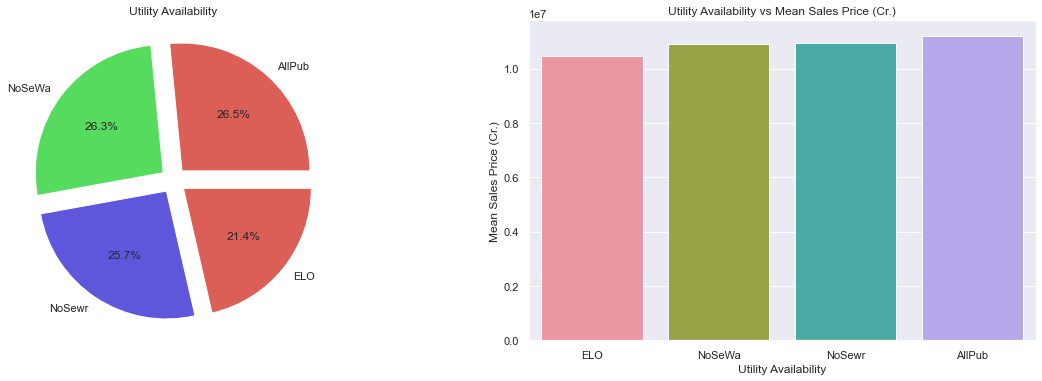

In [686]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.1, 0.1, 0.1, 0.1)
plt.pie(df.UTILITY_AVAIL.value_counts(), labels=df.UTILITY_AVAIL.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('Utility Availability')

plt.subplot(322)
UtilityA_SaleP = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = UtilityA_SaleP['SALES_PRICE'], x = UtilityA_SaleP['UTILITY_AVAIL'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('Utility Availability')
plt.title('Utility Availability vs Mean Sales Price (Cr.)')

plt.show()

##### Observation
---------------
1. Houses with All Public Utilities (AllPub) (Electricity, Gas, Water & Septic tank) were sold most eventhough they are the costliest properties.
2. Ordinal encoding can be applied.

### 5.1.7 STREET

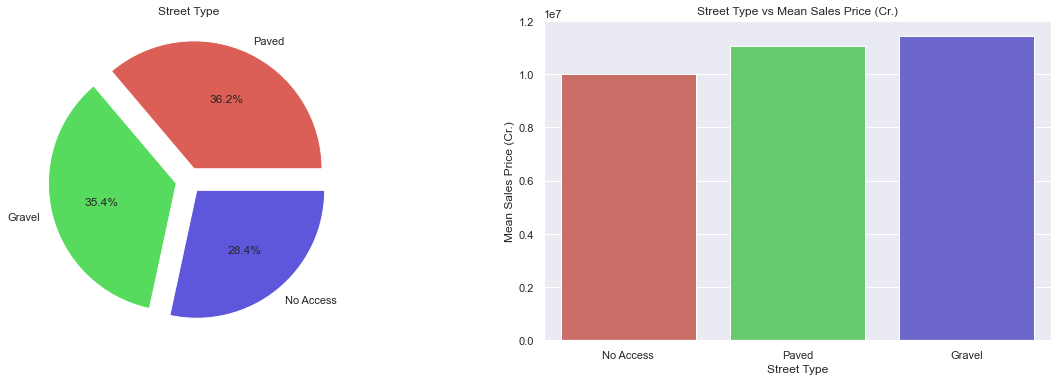

In [687]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.1, 0.1, 0.1)
plt.pie(df.STREET.value_counts(), labels=df.STREET.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('Street Type')

plt.subplot(322)
Street_SaleP = df.groupby('STREET')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = Street_SaleP['SALES_PRICE'], x = Street_SaleP['STREET'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('Street Type')
plt.title('Street Type vs Mean Sales Price (Cr.)')

plt.show()

##### Observation
-----------------
1. Paved street type were sold most (36.2%) and they have average mean sales price.
2. Ordinal encoding can be applied.

### 5.1.8 MZZONE

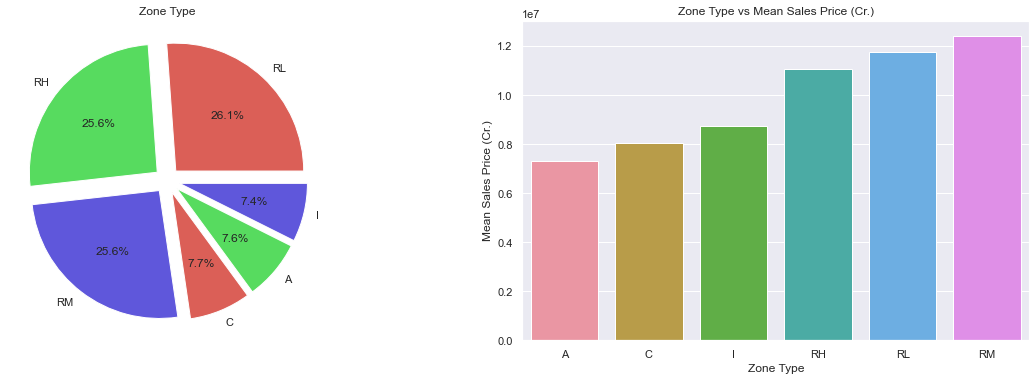

In [688]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(df.MZZONE.value_counts(), labels=df.MZZONE.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('Zone Type')

plt.subplot(322)
Zone_SaleP = df.groupby('MZZONE')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = Zone_SaleP['SALES_PRICE'], x = Zone_SaleP['MZZONE'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('Zone Type')
plt.title('Zone Type vs Mean Sales Price (Cr.)')

plt.show()

##### Observation
-------------
1. Residential low density zone houses (26.1%) were sold most.
2. Residential medium density zone houses are the costliest.
3. Ordinal encoding can be applied.

## 5.2 Continous Feature Analysis

### 5.2.1 SALES_PRICE

In [689]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE    1.000000
REG_FEE        0.878148
COMMIS         0.626275
INT_SQFT       0.612125
N_ROOM         0.602760
N_BEDROOM      0.330987
N_BATHROOM     0.108834
HOUSE_AGE     -0.119192
Name: SALES_PRICE, dtype: float64

In [690]:
df['SALES_PRICE'].describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

Text(0.5, 1.0, 'SALES PRICE')

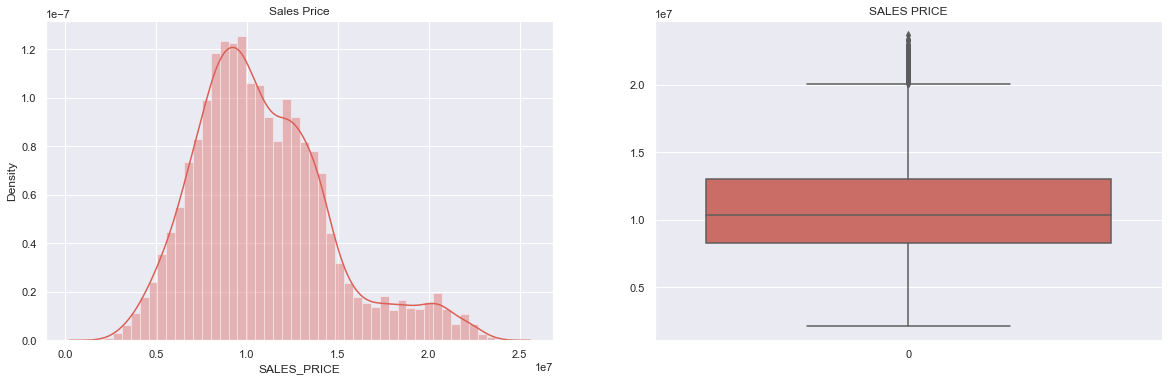

In [691]:
plt.figure(figsize=(20, 20)) # most data are b/w 50L to 1.5C
plt.subplot(321)
sns.distplot(df.SALES_PRICE, hist=True)
plt.title('Sales Price')

plt.subplot(322)
sns.boxplot(data=df.loc[:, 'SALES_PRICE'])
plt.title('SALES PRICE')

##### Observation
--------------------
1. Data seems to follow Normal Distribution
2. Mean sales price is 1.08 Cr.
3. Most houses sold were between 50L to 1.5Cr.

### 5.2.2 INT_SQFT

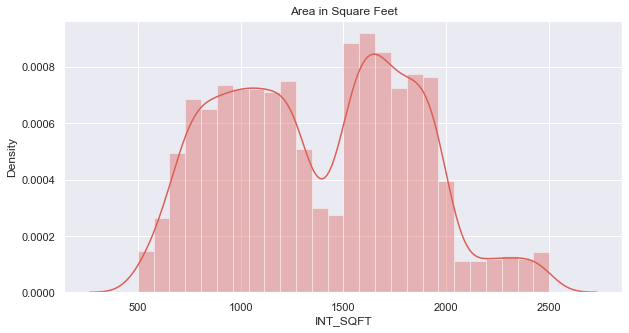

In [692]:
plt.figure(figsize=(10, 5))
sns.distplot(df.INT_SQFT, hist=True)
plt.title('Area in Square Feet')
plt.show()

Text(0.5, 1.0, 'INT_SQFT vs SALES_PRICE')

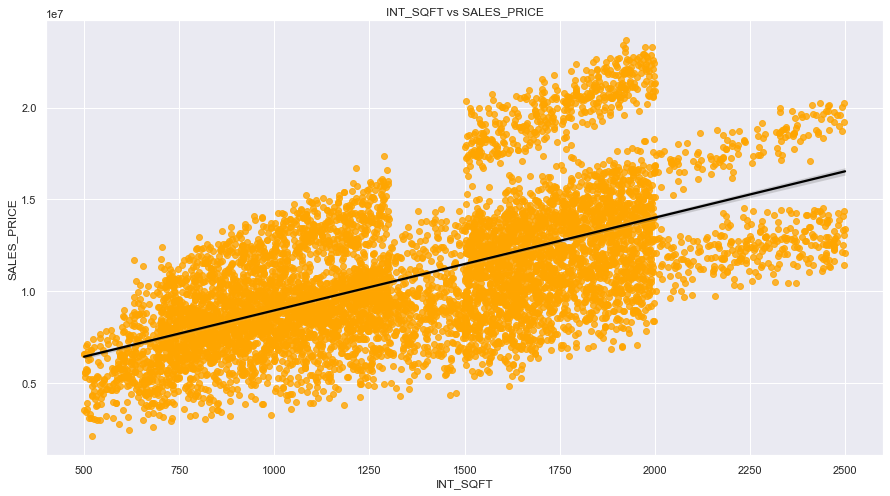

In [693]:
# Area in SqFt vs Sales price
plt.figure(figsize=(15, 8))
sns.regplot(x=df.INT_SQFT, y=df.SALES_PRICE, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('INT_SQFT vs SALES_PRICE')

##### Observation
------------------
1. Area(SQFT) doesn't follow the normal distribution curve.
2. Correlation with sales price is 0.612125 (approx. 61.2%), more the area sq ft, higher the price.

### 5.2.3 HOUSE_AGE

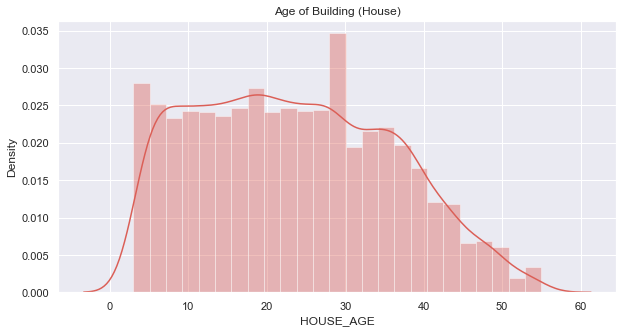

In [694]:
plt.figure(figsize=(10, 5))
sns.distplot(df.HOUSE_AGE, hist=True)
plt.title('Age of Building (House)')
plt.show()

Text(0.5, 1.0, 'HOUSE_AGE vs SALES_PRICE')

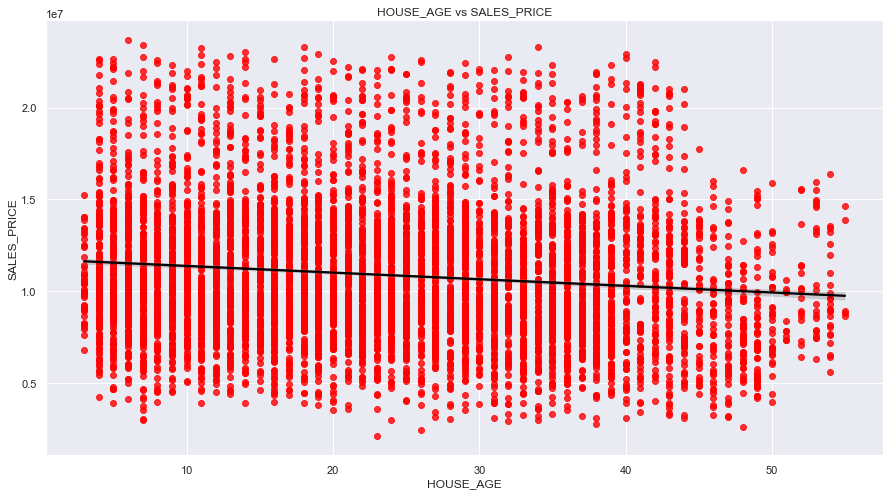

In [695]:
# Building (House) Age vs Sales price
plt.figure(figsize=(15, 8))
sns.regplot(x=df.HOUSE_AGE, y=df.SALES_PRICE, scatter_kws={'color':'red'}, line_kws={'color':'black'})
plt.title('HOUSE_AGE vs SALES_PRICE')

##### Observation
------------------
1. House age correlation with sales price is -0.119192 (approx. 12%), means it affect price negatively. Older the building, lesser the price.

## 5.3 Encoding

In [712]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,380000,144400,7600000,43
1,Anna Nagar,1986,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,760122,304049,21717770,10
2,Adyar,909,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,421094,92114,13159200,19
3,Velachery,1855,3,2,5,Family,No,Others,NoSewr,Paved,I,356321,77042,9630290,21
4,Karapakkam,1226,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,237000,74063,7406250,29


In [713]:
# ORDINAL ENCODING for AREA, SALE_COND, UTILITY_AVAIL, STREET, MZZONE, PARK_FACIL, BUILDTYPE columns
df.AREA.replace({
                            'Karapakkam' : 0,
                            'Adyar' : 1,
                            'Chrompet' : 2,
                            'Velachery' : 3,
                            'KK Nagar' : 4,
                            'Anna Nagar' : 5,
                            'T Nagar' : 6
}, inplace=True)
df.AREA = df.AREA.astype(int)
df.SALE_COND.replace({
                            'Partial' : 0,
                            'Family' : 1,
                            'AbNormal' : 2,
                            'Normal Sale' : 3,
                            'Adj Land' : 4
}, inplace=True)
df.SALE_COND = df.SALE_COND.astype(int)
df.PARK_FACIL.replace({
                            'No' : 0,
                            'Yes' : 1
}, inplace=True)
df.PARK_FACIL = df.PARK_FACIL.astype(int)
df.BUILDTYPE.replace({
                            'House' : 0, 
                            'Others' : 1, 
                            'Commercial' : 2
}, inplace=True)
df.BUILDTYPE = df.BUILDTYPE.astype(int)
df.UTILITY_AVAIL.replace({
                            'ELO' : 0,
                            'NoSeWa' : 1,
                            'NoSewr' : 2,
                            'AllPub' : 3
}, inplace=True)
df.UTILITY_AVAIL = df.UTILITY_AVAIL.astype(int)
df.STREET.replace({
                            'No Access' : 0,
                            'Paved' : 1,
                            'Gravel' : 2
}, inplace=True)
df.STREET = df.STREET.astype(int)
df.MZZONE.replace({
                            'A' : 0,
                            'C' : 1,
                            'I' : 2,
                            'RH' : 3,
                            'RL' : 4,
                            'RM' : 5
}, inplace=True)
df.MZZONE = df.MZZONE.astype(int)

In [714]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,0,1004,1,1,3,2,1,2,3,1,0,380000,144400,7600000,43
1,5,1986,2,1,5,2,0,2,3,2,3,760122,304049,21717770,10
2,1,909,1,1,3,2,1,2,0,2,4,421094,92114,13159200,19
3,3,1855,3,2,5,1,0,1,2,1,2,356321,77042,9630290,21
4,0,1226,1,1,3,2,1,1,3,2,1,237000,74063,7406250,29


In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AREA           7109 non-null   int32
 1   INT_SQFT       7109 non-null   int64
 2   N_BEDROOM      7109 non-null   int32
 3   N_BATHROOM     7109 non-null   int32
 4   N_ROOM         7109 non-null   int64
 5   SALE_COND      7109 non-null   int32
 6   PARK_FACIL     7109 non-null   int32
 7   BUILDTYPE      7109 non-null   int32
 8   UTILITY_AVAIL  7109 non-null   int32
 9   STREET         7109 non-null   int32
 10  MZZONE         7109 non-null   int32
 11  REG_FEE        7109 non-null   int64
 12  COMMIS         7109 non-null   int64
 13  SALES_PRICE    7109 non-null   int64
 14  HOUSE_AGE      7109 non-null   int32
dtypes: int32(10), int64(5)
memory usage: 555.5 KB


# 6. REGRESSION

## 6.1 Splitting Dataset

In [716]:
# Splitting features and labels
X_FEATURE = df.drop(['SALES_PRICE'], axis=1)
Y_LABEL = df.SALES_PRICE
X_train, X_test, Y_train, Y_test = train_test_split(X_FEATURE, Y_LABEL, test_size=0.3, random_state=42) # test data 30%

In [719]:
print(X_train.shape, X_test.shape)

(4976, 14) (2133, 14)


In [720]:
print(Y_train.shape, Y_test.shape)

(4976,) (2133,)


In [738]:
# Store Scoring value for each ML Algorithms
scores = []

## 6.2 Linear Regression

In [732]:
#classifier: clf_LR
clf_LR = linear_model.LinearRegression()
clf_LR.fit(X_train, Y_train) # fitting training features and labels

LinearRegression()

In [733]:
Y_predict = clf_LR.predict(X_test)
Y_predict

array([14384856.46394588,  8192252.86423896, 18176413.68692765, ...,
       11753963.59506303, 10162202.32297516,  8618583.6797703 ])

In [739]:
# Score of Linear Regression
scores.append(r2_score(Y_test, Y_predict)*100)
scores[0]

90.91226050373477

## 6.3 XG Boost

In [740]:
#classifier: clf
clf_XGB = XGBRegressor(learning_rate= 0.7, n_estimators=100, verbosity=0)
clf_XGB.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [741]:
Y_predict = clf_XGB.predict(X_test)
Y_predict

array([13172575. ,  7488013.5, 16223282. , ..., 13644797. ,  9307272. ,
        7546406. ], dtype=float32)

In [743]:
# Score of XGB Boost
scores.append(r2_score(Y_test, Y_predict)*100)
scores[1]

98.1535216925537

## 6.4 Random Forest

In [745]:
#classifier: clf
clf_RF = ensemble.RandomForestRegressor(n_estimators=150)
clf_RF.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=150)

In [746]:
Y_predict = clf_RF.predict(X_test)
Y_predict

array([12914038.93333333,  8024545.        , 16548819.26666667, ...,
       12885207.33333333,  9528765.16666667,  8045443.7       ])

In [747]:
# Score of Random Forest
scores.append(r2_score(Y_test, Y_predict)*100)
scores[2]

97.79705263622944

## 6.5 Decision Tree

In [748]:
#classifier: clf
clf_DT = tree.DecisionTreeRegressor(random_state=42, max_depth=40)
clf_DT.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=40, random_state=42)

In [749]:
Y_predict = clf_DT.predict(X_test)
Y_predict

array([13391620.,  7802500., 16935440., ..., 13501410.,  8965500.,
        7626210.])

In [750]:
# Score of XGB Boost
scores.append(r2_score(Y_test, Y_predict)*100)
scores[3]

95.03590500265162

# 7. CONCLUSION

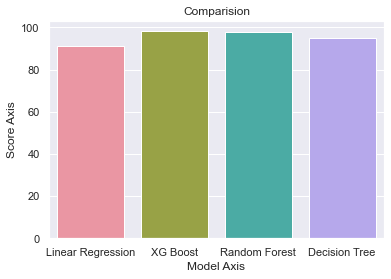

In [751]:
labels = ['Linear Regression', 'XG Boost', 'Random Forest', 'Decision Tree']
sns.barplot(labels, scores)
plt.title('Comparision')
plt.ylabel('Score Axis')
plt.xlabel('Model Axis')
plt.show()

In [752]:
scores

[90.91226050373477, 98.1535216925537, 97.79705263622944, 95.03590500265162]